In [1]:

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

In [2]:
data= pd.read_csv(r"Text_Preprocessing.csv")
data.head()

,Unnamed: 0,tweet,klasifikasi,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed
0,0,pemerintah lampung bantuan mahasiswa derasnya ...,negative,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...",<FreqDist with 12 samples and 14 outcomes>,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['perintah', 'lampung', 'bantu', 'mahasiswa', ..."
1,1,pemerintah menerapkan herd immunity kemampuan ...,negative,"['pemerintah', 'menerapkan', 'herd', 'immunity...",<FreqDist with 18 samples and 19 outcomes>,"['pemerintah', 'menerapkan', 'herd', 'immunity...","['pemerintah', 'menerapkan', 'herd', 'immunity...","['perintah', 'terap', 'herd', 'immunity', 'mam..."
2,2,lakukan makanan berbuka sahur kepala keluarga ...,positive,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...",<FreqDist with 20 samples and 20 outcomes>,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['laku', 'makan', 'buka', 'sahur', 'kepala', '..."
3,3,warga positif corona bupati kondisi menuntut k...,positive,"['warga', 'positif', 'corona', 'bupati', 'kond...",<FreqDist with 21 samples and 23 outcomes>,"['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond..."
4,4,emosi banget kondisi disuruh liputan covid dos...,negative,"['emosi', 'banget', 'kondisi', 'disuruh', 'lip...",<FreqDist with 13 samples and 15 outcomes>,"['emosi', 'banget', 'kondisi', 'disuruh', 'lip...","['emosi', 'banget', 'kondisi', 'disuruh', 'lip...","['emosi', 'banget', 'kondisi', 'suruh', 'liput..."


In [3]:
data = pd.read_csv('Text_Preprocessing.csv',encoding='utf-8',error_bad_lines=False)
data.klasifikasi.replace(['negative','positive'],[0,1],inplace=True)

In [4]:
data

,Unnamed: 0,tweet,klasifikasi,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed
0,0,pemerintah lampung bantuan mahasiswa derasnya ...,0,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...",<FreqDist with 12 samples and 14 outcomes>,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['perintah', 'lampung', 'bantu', 'mahasiswa', ..."
1,1,pemerintah menerapkan herd immunity kemampuan ...,0,"['pemerintah', 'menerapkan', 'herd', 'immunity...",<FreqDist with 18 samples and 19 outcomes>,"['pemerintah', 'menerapkan', 'herd', 'immunity...","['pemerintah', 'menerapkan', 'herd', 'immunity...","['perintah', 'terap', 'herd', 'immunity', 'mam..."
2,2,lakukan makanan berbuka sahur kepala keluarga ...,1,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...",<FreqDist with 20 samples and 20 outcomes>,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['laku', 'makan', 'buka', 'sahur', 'kepala', '..."
3,3,warga positif corona bupati kondisi menuntut k...,1,"['warga', 'positif', 'corona', 'bupati', 'kond...",<FreqDist with 21 samples and 23 outcomes>,"['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond..."
4,4,emosi banget kondisi disuruh liputan covid dos...,0,"['emosi', 'banget', 'kondisi', 'disuruh', 'lip...",<FreqDist with 13 samples and 15 outcomes>,"['emosi', 'banget', 'kondisi', 'disuruh', 'lip...","['emosi', 'banget', 'kondisi', 'disuruh', 'lip...","['emosi', 'banget', 'kondisi', 'suruh', 'liput..."
...,...,...,...,...,...,...,...,...
36917,36917,hoaks hoaks beredar covid pemerintah mengendal...,1,"['hoaks', 'hoaks', 'beredar', 'covid', 'pemeri...",<FreqDist with 12 samples and 13 outcomes>,"['hoaks', 'hoaks', 'beredar', 'covid', 'pemeri...","['hoaks', 'hoaks', 'beredar', 'covid', 'pemeri...","['hoaks', 'hoaks', 'edar', 'covid', 'perintah'..."
36918,36918,tingginya covid majelis permusyawaratan rakyat...,1,"['tingginya', 'covid', 'majelis', 'permusyawar...",<FreqDist with 11 samples and 12 outcomes>,"['tingginya', 'covid', 'majelis', 'permusyawar...","['tingginya', 'covid', 'majelis', 'permusyawar...","['tinggi', 'covid', 'majelis', 'musyawarat', '..."
36919,36919,pakai masker cuci hand sanitizer namanya idiot...,0,"['pakai', 'masker', 'cuci', 'hand', 'sanitizer...",<FreqDist with 14 samples and 14 outcomes>,"['pakai', 'masker', 'cuci', 'hand', 'sanitizer...","['pakai', 'masker', 'cuci', 'hand', 'sanitizer...","['pakai', 'masker', 'cuci', 'hand', 'sanitizer..."
36920,36920,kabupaten aceh selatan zona hijau terlibat pem...,0,"['kabupaten', 'aceh', 'selatan', 'zona', 'hija...",<FreqDist with 15 samples and 17 outcomes>,"['kabupaten', 'aceh', 'selatan', 'zona', 'hija...","['kabupaten', 'aceh', 'selatan', 'zona', 'hija...","['kabupaten', 'aceh', 'selatan', 'zona', 'hija..."


In [4]:
#data_train, data_test = train_test_split(data, test_size=0.30, random_state=42)
data_train, data_test = train_test_split(data, test_size=0.30)
data_train['tweet']=data_train['tweet'].values.astype('U')
data_test['tweet']=data_test['tweet'].values.astype('U')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
#vectorizer = TfidfVectorizer(min_df = 5,
 #                            max_df = 0.8,
  #                           sublinear_tf = True,
   #                          use_idf = True)
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(data_train['tweet'])
test_vectors = vectorizer.transform(data_test['tweet'])

In [ ]:
print (train_vectors)

  (0, 4868)	0.0647597328390235
  (0, 11167)	0.4029854598930546
  (0, 21776)	0.06489517716548106
  (0, 24272)	0.27079955139631695
  (0, 25004)	0.42189925398200756
  (0, 25145)	0.36884215936220144
  (0, 25234)	0.3191055172468851
  (0, 31206)	0.3433670310718287
  (0, 31935)	0.47126674703779553
  (1, 1346)	0.1944066540381598
  (1, 2228)	0.24280612942443883
  (1, 2323)	0.22538449137290473
  (1, 4868)	0.06419720550278195
  (1, 5242)	0.14166935364361333
  (1, 8772)	0.21721577478650586
  (1, 9134)	0.2808026699900705
  (1, 10078)	0.20730273267121954
  (1, 15093)	0.17550395860393367
  (1, 15964)	0.2952877647016691
  (1, 20591)	0.23786595091001386
  (1, 20731)	0.23576584248755453
  (1, 20785)	0.32244173307789503
  (1, 21581)	0.2148980621504991
  (1, 21668)	0.15816682350043115
  (1, 21776)	0.03216573665450169
  :	:
  (25843, 22975)	0.2907342628979602
  (25843, 23963)	0.24704760652067914
  (25843, 26258)	0.22003643811953347
  (25843, 27087)	0.28518405379078404
  (25843, 31935)	0.22188196496803964
 

In [ ]:
print (test_vectors)

  (0, 865)	0.16471906258839442
  (0, 4868)	0.03379786843587159
  (0, 6558)	0.2707783052890602
  (0, 8402)	0.2830242959479191
  (0, 13315)	0.29273192516055685
  (0, 14288)	0.20705603750182688
  (0, 16500)	0.18596268962955076
  (0, 17765)	0.32227400199925993
  (0, 18029)	0.24260864408277896
  (0, 18314)	0.23731610518707605
  (0, 19646)	0.13134581803566903
  (0, 21776)	0.03386855633598039
  (0, 24940)	0.30243955437319464
  (0, 27810)	0.13528796075082195
  (0, 30128)	0.32227400199925993
  (0, 31214)	0.20408291972413947
  (0, 31223)	0.3064140600764748
  (0, 31241)	0.26181233882623034
  (1, 4868)	0.08119805117995177
  (1, 11887)	0.2790100898852393
  (1, 12820)	0.3330114821781552
  (1, 13684)	0.3961703657133799
  (1, 18252)	0.2937907794799534
  (1, 18624)	0.30599597613932705
  (1, 19734)	0.1537156929127365
  :	:
  (11075, 23250)	0.16264398556521045
  (11075, 25234)	0.12938339068559637
  (11075, 27985)	0.17489168476117123
  (11075, 28700)	0.19521048538690453
  (11075, 29543)	0.1116835218767498

In [9]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
# Perform classification with SVM, kernel=linear
classifier_linear = LinearSVC(verbose=1)
t0 = time.time()
history = classifier_linear.fit(train_vectors, data_train['klasifikasi'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['klasifikasi'], prediction_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])
y_train_hat=classifier_linear.predict(train_vectors)
y_test_hat=classifier_linear.predict(test_vectors)

#print( "train accuracy= "  ,np.mean(y_train_hat == data_train['sentiment'])*100)
#print ("test accuracy= "  ,np.mean(y_test_hat == data_test['sentiment'])*100)

[LibLinear]Training time: 0.242601s; Prediction time: 0.001772s
positive:  {'precision': 0.8275355218030377, 'recall': 0.7523385300668152, 'f1-score': 0.7881474568362109, 'support': 4490}
negative:  {'precision': 0.8410293066476054, 'recall': 0.8931228176711705, 'f1-score': 0.8662936239140038, 'support': 6587}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
import numpy as np
#lin_svm=svm.LinearSVC()
lin_svm= svm.SVC(kernel='linear',C=1)
lin_svm.fit(train_vectors, data_train['klasifikasi'])
#lin_svm.fit(test_vectors, data_test['sentiment'])
y_train_hat=lin_svm.predict(train_vectors)
y_test_hat=lin_svm.predict(test_vectors)

print( "train accuracy= "  ,np.mean(y_train_hat == data_train['klasifikasi'])*100)
print ("test accuracy= "  ,np.mean(y_test_hat == data_test['klasifikasi'])*100)

train accuracy=  91.38324627587541
test accuracy=  83.97580572357136


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

Accuracy score is 91%.

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     15473
           1       0.92      0.85      0.89     10372

    accuracy                           0.91     25845
   macro avg       0.92      0.90      0.91     25845
weighted avg       0.91      0.91      0.91     25845


Confusion Matrix:


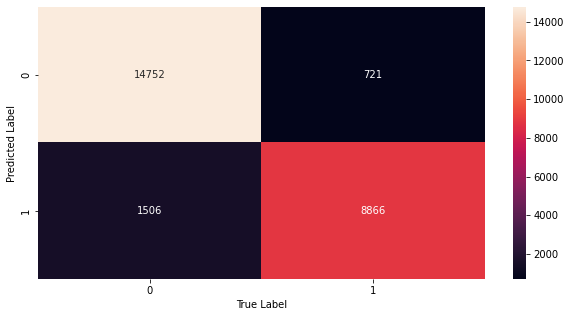

In [14]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy = accuracy_score(data_train['klasifikasi'],y_train_hat) * 100
print("Accuracy score is {}%.".format(round(accuracy),1))
print()
print("Classification Report:")
print(classification_report(data_train['klasifikasi'], y_train_hat))
print()

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(data_train['klasifikasi'],y_train_hat), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

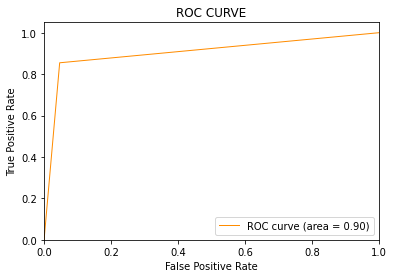

In [23]:
# ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(data_train['klasifikasi'], y_train_hat)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Area Under Curve: 0.9041020449166282


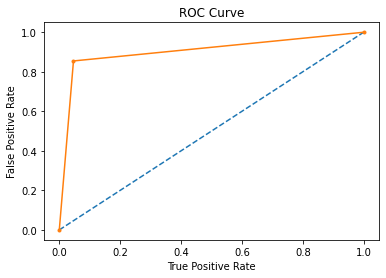

In [26]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(data_train['klasifikasi'], y_train_hat)
print('Area Under Curve:', auc)
fpr, tpr, thresholds = roc_curve(data_train['klasifikasi'], y_train_hat)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()